In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
print(pd.__version__ , sns.__version__,np.__version__)

1.4.4 0.12.0 1.23.2


In [2]:
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")
print(train_df.shape,test_df.shape)

(1460, 81) (1459, 80)


In [3]:
combine=[train_df,test_df]
for dataset in combine:
    print(dataset.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [4]:
all_data_na = (train_df.isnull().sum()/len(train_df))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


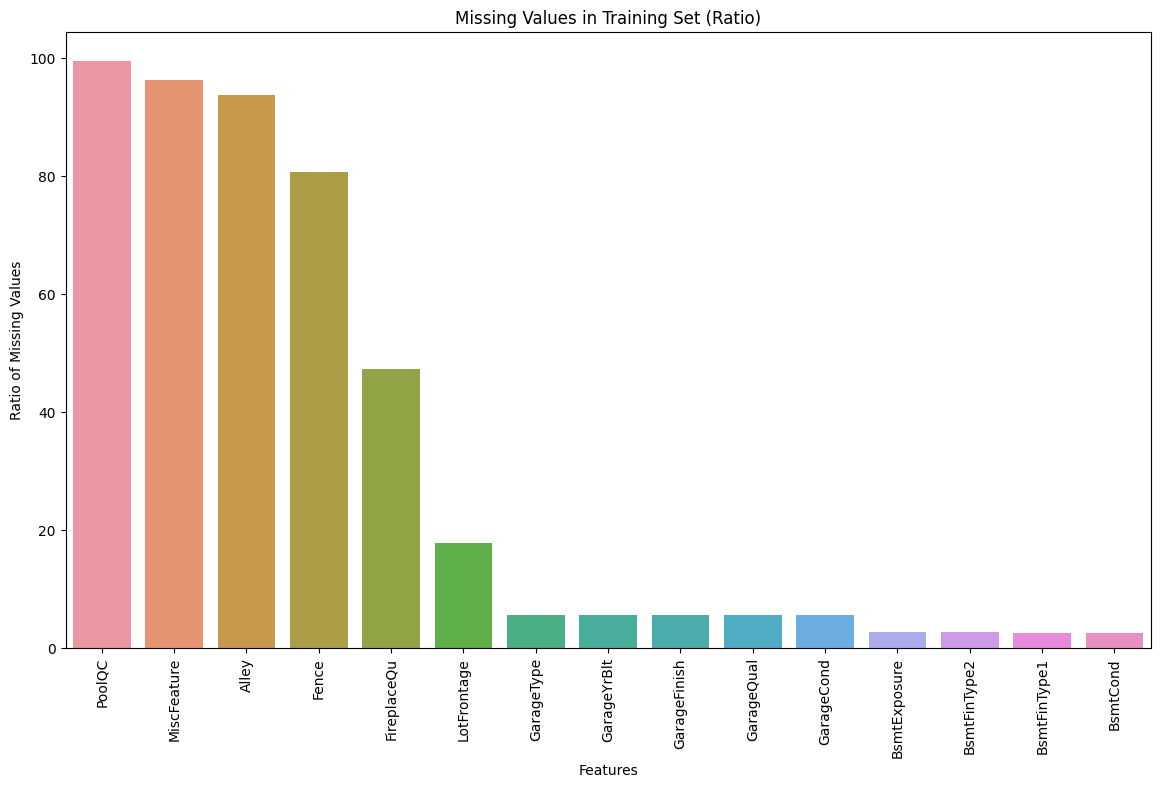

In [5]:
fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(x=all_data_na.index ,y=all_data_na)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Ratio of Missing Values')
plt.title('Missing Values in Training Set (Ratio)')
plt.show()

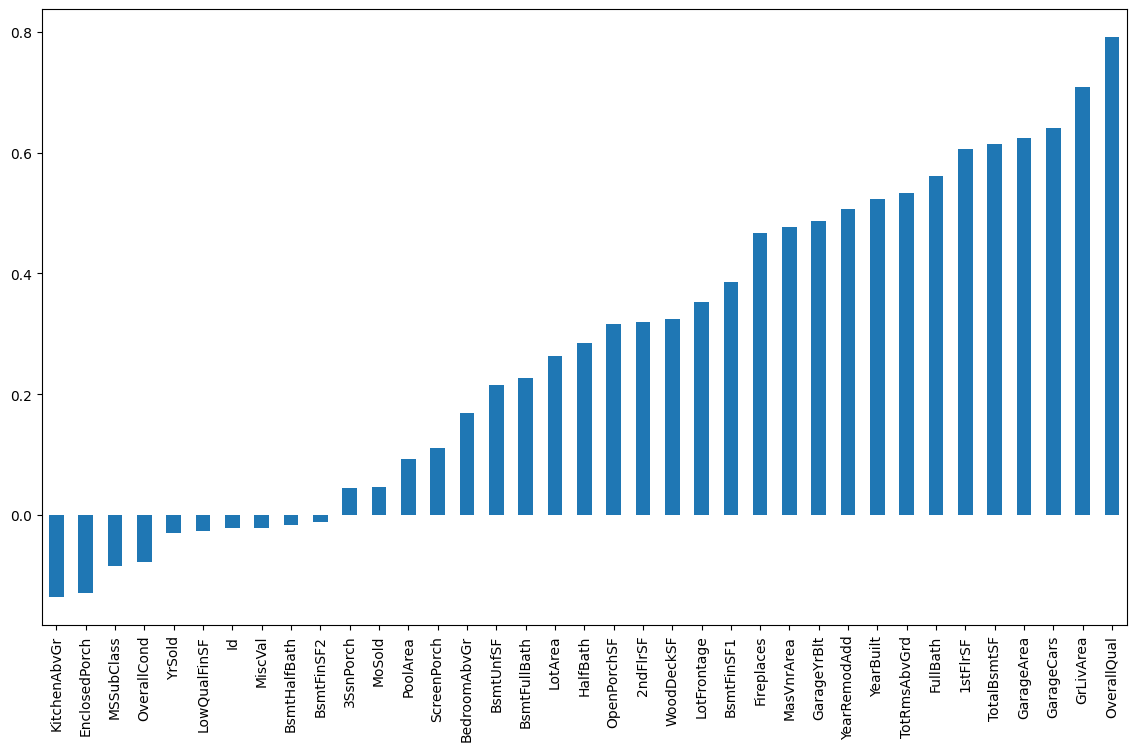

In [6]:
plt.figure(figsize=(14,8))
train_df.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [7]:
train_df[train_df["SalePrice"]>600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [8]:
train_df=train_df.drop(index=[691,898,1169,1182])

In [9]:
sim=train_df.drop("PoolQC",axis=1)

In [10]:
sim=sim.drop("Alley",axis=1)

In [11]:
sim=sim.drop("Fence",axis=1)

In [12]:
sim=sim.drop("MiscFeature",axis=1)

In [13]:
sim=sim.drop("FireplaceQu",axis=1)

In [14]:
all_data_na = (sim.isnull().sum()/len(sim))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data
LotFrontage,17.788462
GarageType,5.563187
GarageYrBlt,5.563187
GarageFinish,5.563187
GarageQual,5.563187
GarageCond,5.563187
BsmtExposure,2.609890
BsmtFinType2,2.609890
BsmtQual,2.541209
BsmtCond,2.541209


In [15]:
combine=[sim,test_df]

In [16]:
title_mapping={"EX":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["GarageQual"]=dataset["GarageQual"].map(title_mapping)
    dataset["GarageQual"]=dataset["GarageQual"].fillna(0)
sim[["GarageQual","SalePrice"]].groupby(["GarageQual"],as_index=True).mean()

,SalePrice
GarageQual,
0.0,108234.523810
1.0,100166.666667
2.0,123573.354167
3.0,185969.791890
4.0,215860.714286


In [17]:
title_mapping={"EX":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["GarageCond"]=dataset["GarageCond"].map(title_mapping)
    dataset["GarageCond"]=dataset["GarageCond"].fillna(0)
sim[["GarageCond","SalePrice"]].groupby(["GarageCond"],as_index=True).mean()

,SalePrice
GarageCond,
0.0,103815.662651
1.0,108500.000000
2.0,114654.028571
3.0,186384.136157
4.0,179930.000000


In [18]:
title_mapping={"Fin":6,"RFn":5,"Unf":3}
for dataset in combine:
    dataset["GarageFinish"]=dataset["GarageFinish"].map(title_mapping)
    dataset["GarageFinish"]=dataset["GarageFinish"].fillna(0)
sim[["GarageFinish","SalePrice"]].groupby(["GarageFinish"],as_index=True).mean()

,SalePrice
GarageFinish,
0.0,103317.283951
3.0,142156.423140
5.0,202068.869668
6.0,234947.959770


In [19]:
title_mapping={"BuiltIn":8,"Attchd":7,"Basment":5,"2Types" : 4,"Detchd":3, "CarPort" : 1}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["GarageType","SalePrice"]].groupby(["GarageType"],as_index=False).mean()

,GarageType,SalePrice
0,0.0,103317.283951
1,1.0,109962.111111
2,3.0,134091.162791
3,4.0,151283.333333
4,5.0,160570.684211
5,7.0,200669.692841
6,8.0,254751.738636


In [20]:
for dataset in combine:
    dataset["Gagagepoint"]=dataset["GarageQual"]+dataset["GarageCond"]+dataset["GarageType"]+dataset["GarageFinish"]


In [21]:
sim[["Gagagepoint","SalePrice"]].groupby(["Gagagepoint"],as_index=False).mean()

,Gagagepoint,SalePrice
0,0.0,103317.283951
1,6.0,127500.000000
2,8.0,98875.000000
3,9.0,166208.428571
4,10.0,112774.458333
5,11.0,125108.466667
6,12.0,133578.825939
7,13.0,150510.000000
8,14.0,155216.214286
9,15.0,142558.263158


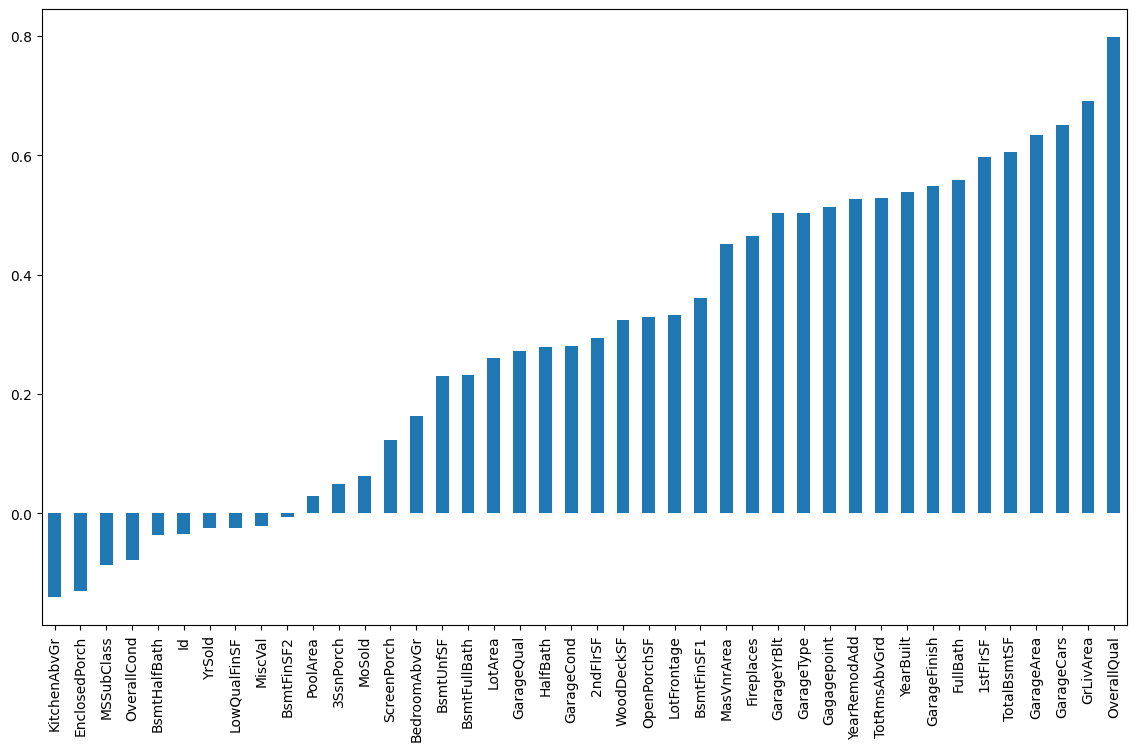

In [22]:
plt.figure(figsize=(14,8))
sim.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [24]:
sim=sim.drop("GarageQual",axis=1)

In [25]:
sim=sim.drop("GarageCond",axis=1)

In [26]:
sim=sim.drop("GarageType",axis=1)

In [27]:
sim=sim.drop("GarageFinish",axis=1)

In [28]:
all_data_na = (sim.isnull().sum()/len(sim))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data
LotFrontage,17.788462
GarageYrBlt,5.563187
BsmtExposure,2.609890
BsmtFinType2,2.609890
BsmtQual,2.541209
BsmtCond,2.541209
BsmtFinType1,2.541209
MasVnrType,0.549451
MasVnrArea,0.549451
Electrical,0.068681


In [66]:
title_mapping={"2.5Fin":8,"2Story":7,"1Story":6,"SLvl" :5,"2.5Unf":4, "1.5Fin" : 3 ,"SFoyer":2,"1.5Unf":1}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["HouseStyle","SalePrice"]].groupby(["HouseStyle"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,HouseStyle,SalePrice
3,2.5Fin,220000.000000
5,2Story,206669.762443
2,1Story,175384.551724
7,SLvl,166703.384615
4,2.5Unf,157354.545455
0,1.5Fin,143116.740260
6,SFoyer,135074.486486
1,1.5Unf,110150.000000


In [34]:
title_mapping={"Shed":6,"Hip" :5,"Flat":4, "Mansard" : 3 ,"Gable":2,"Gambrel":1}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["RoofStyle","SalePrice"]].groupby(["RoofStyle"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,RoofStyle,SalePrice
5,Shed,225000.000000
3,Hip,214194.862191
0,Flat,194690.000000
4,Mansard,180568.428571
1,Gable,170972.100000
2,Gambrel,148909.090909


In [35]:
title_mapping={"WdShngl":8,"Membran":7,"WdShake":7,"Tar&Grv" :5,"Metal":4, "CompShg" : 4 ,"ClyTile":3,"Roll":1}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["RoofMatl","SalePrice"]].groupby(["RoofMatl"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,RoofMatl,SalePrice
7,WdShngl,317300.000000
2,Membran,241500.000000
6,WdShake,241400.000000
5,Tar&Grv,185406.363636
3,Metal,180000.000000
1,CompShg,178795.820405
0,ClyTile,160000.000000
4,Roll,137000.000000


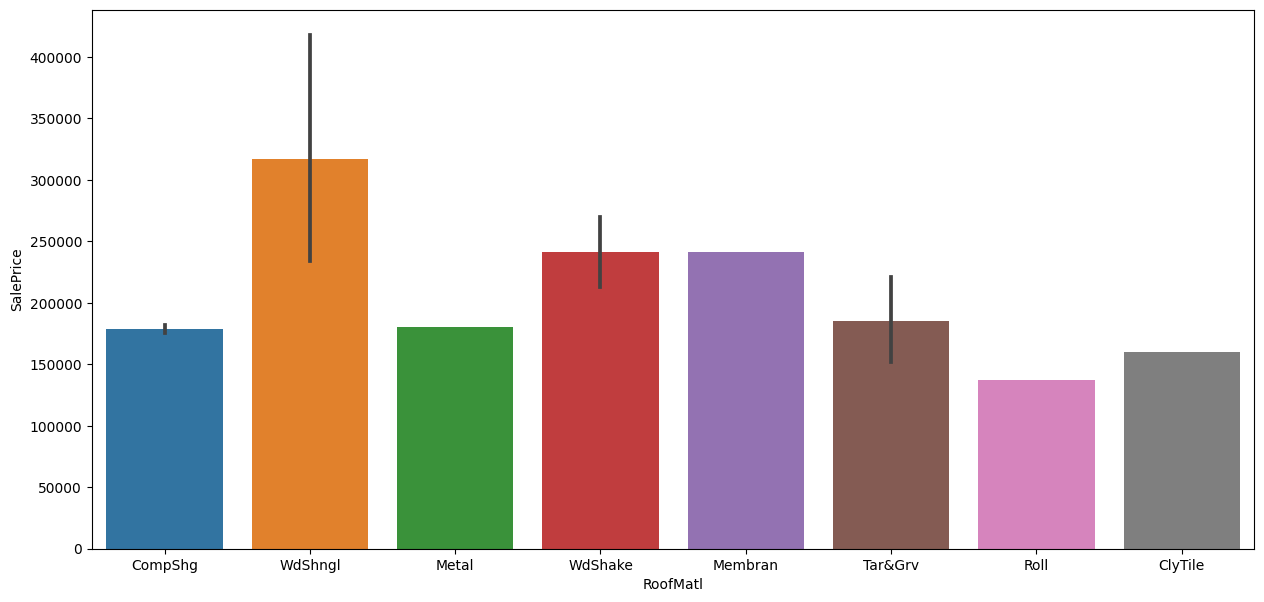

In [36]:
plt.subplots(figsize=(15,7))
sns.barplot(data=sim, x="RoofMatl",y="SalePrice")
plt.show()

In [67]:
title_mapping={"ImStucc":16,"Stone":15,"CemntBd":14,"VinylSd":13,"BrkFace":12,"Plywood":11,"Stucco":10,"HdBoard":9,"WdShing":8,"MetalSd":7,"Wd Sdng":6,"AsbShng":4,"CBlock":4,"AsphShn":4,"BrkComm":3}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["Exterior1st","SalePrice"]].groupby(["Exterior1st"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

SyntaxError: EOL while scanning string literal (1210681880.py, line 1)

In [38]:
title_mapping={"Other":16,"CmentBd":15,"CemntBd":14,"VinylSd":13,"ImStucc":12,"BrkFace":11,"Plywood":10,"HdBoard":9,"Wd Shng":9,"Stone":8,"Stucco":8,"MetalSd":7,"Wd Sdng":7,"AsphShn":5,"Brk Cmn":4,"AsbShng":3,"CBlock":2}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["Exterior2nd","SalePrice"]].groupby(["Exterior2nd"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Exterior2nd,SalePrice
9,Other,319000.000000
5,CmentBd,230093.833333
13,VinylSd,213642.749503
7,ImStucc,197300.000000
3,BrkFace,195818.000000
10,Plywood,168112.387324
6,HdBoard,162565.580488
15,Wd Shng,161328.947368
11,Stone,158224.800000
12,Stucco,155905.153846


In [39]:
sim[["MasVnrType","SalePrice"]].groupby(["MasVnrType"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,MasVnrType,SalePrice
3,Stone,262858.637795
1,BrkFace,202500.864560
2,None,155539.645423
0,BrkCmn,146318.066667


In [65]:
sim[["BldgType","SalePrice"]].groupby(["BldgType"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,BldgType,SalePrice
0,1Fam,184124.332237
4,TwnhsE,181959.342105
3,Twnhs,135911.627907
2,Duplex,133541.076923
1,2fmCon,128432.258065


In [59]:
lotc_mapping={"CulDSac":7, "FR3":6, "FR2":3, "Corner":4, "Inside":2}
for dataset in combine:
    dataset["LotConfig"]=dataset["LotConfig"].map(lotc_mapping)
    dataset["LotConfig"]=dataset["LotConfig"].fillna(0)
sim[["LotConfig","SalePrice"]].groupby(["LotConfig"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,LotConfig,SalePrice
1,CulDSac,219541.225806
3,FR3,208475.000000
2,FR2,177934.574468
0,Corner,177268.049808
4,Inside,176524.423406


In [60]:
title_mapping={"CulDSac":7, "FR3":6, "FR2":3, "Corner":4, "Inside":2}
for dataset in combine:
    dataset["LotConfig"]=dataset["LotConfig"].map(title_mapping)
    dataset["LotConfig"]=dataset["LotConfig"].fillna(0)


,LotConfig,SalePrice
0,Corner,177268.049808
1,CulDSac,219541.225806
2,FR2,177934.574468
3,FR3,208475.000000
4,Inside,176524.423406


In [64]:
sim[["LandContour","SalePrice"]].groupby(["LandContour"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,LandContour,SalePrice
1,HLS,231533.940000
2,Low,203661.111111
3,Lvl,178641.342770
0,Bnk,143104.079365


In [68]:
title_mapping={"Stone":6, "BrkFace":5, "None":3, "BrkCmn":3}
for dataset in combine:
    dataset["LotConfig"]=dataset["LotConfig"].map(title_mapping)
    dataset["LotConfig"]=dataset["LotConfig"].fillna(0)
sim[["MasVnrType","SalePrice"]].groupby(["MasVnrType"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,MasVnrType,SalePrice
3,Stone,262858.637795
1,BrkFace,202500.864560
2,None,155539.645423
0,BrkCmn,146318.066667


In [69]:
sim[["MasVnrArea","SalePrice"]].groupby(["MasVnrArea"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,MasVnrArea,SalePrice
290,603.0,538000.0
305,748.0,501837.0
313,860.0,485000.0
303,705.0,466500.0
319,1031.0,438780.0
...,...,...
291,604.0,89500.0
252,435.0,89471.0
235,381.0,88000.0
241,408.0,83000.0


In [70]:
title_mapping={"Ex":4, "Gd":3, "TA":2, "Fa":1}
for dataset in combine:
    dataset["ExterQual"]=dataset["ExterQual"].map(title_mapping)
    dataset["ExterQual"]=dataset["ExterQual"].fillna(0)
sim[["ExterQual","SalePrice"]].groupby(["ExterQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,ExterQual,SalePrice
0,Ex,354722.260000
2,Gd,229767.804527
3,TA,144341.313466
1,Fa,87985.214286


In [71]:
title_mapping={"Ex":6, "Gd":5, "TA	":4, "Fa":2,"Po":1}
for dataset in combine:
    dataset["ExterCond"]=dataset["ExterCond"].map(title_mapping)
    dataset["ExterCond"]=dataset["ExterCond"].fillna(0)
sim[["ExterCond","SalePrice"]].groupby(["ExterCond"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,ExterCond,SalePrice
0,Ex,201333.333333
4,TA,182815.543393
2,Gd,165752.034483
1,Fa,102595.142857
3,Po,76500.000000


In [72]:
title_mapping={"GasA":6, "GasW":5, "OthW":4, "Wall":3,"Grav":2,"Floor":2}
for dataset in combine:
    dataset["Heating"]=dataset["Heating"].map(title_mapping)
    dataset["Heating"]=dataset["Heating"].fillna(0)
sim[["Heating","SalePrice"]].groupby(["Heating"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Heating,SalePrice
1,GasA,180610.681180
2,GasW,166632.166667
4,OthW,125750.000000
5,Wall,92100.000000
3,Grav,75271.428571
0,Floor,72500.000000


In [73]:
title_mapping={"Ex":6, "Gd":5, "TA	":4, "Fa":2,"Po":1}
for dataset in combine:
    dataset["HeatingQC"]=dataset["HeatingQC"].map(title_mapping)
    dataset["HeatingQC"]=dataset["HeatingQC"].fillna(0)


,HeatingQC,SalePrice
0,Ex,212367.618725
2,Gd,156858.871369
4,TA,142362.876168
1,Fa,123919.489796
3,Po,87000.000000


In [75]:
title_mapping={"SBrkr":6, "FuseA":3, "FuseF":2, "Mix":1}
for dataset in combine:
    dataset["HeatingQC"]=dataset["HeatingQC"].map(title_mapping)
    dataset["HeatingQC"]=dataset["HeatingQC"].fillna(0)
sim[["KitchenQual","SalePrice"]].groupby(["Electrical"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Electrical,SalePrice
4,SBrkr,185329.356391
0,FuseA,122196.893617
1,FuseF,107675.444444
2,FuseP,97333.333333
3,Mix,67000.000000


In [77]:
title_mapping={"Ex":6, "Gd":5, "TA":4, "Fa":2}
for dataset in combine:
    dataset["HeatingQC"]=dataset["HeatingQC"].map(title_mapping)
    dataset["HeatingQC"]=dataset["HeatingQC"].fillna(1)
sim[["KitchenQual","SalePrice"]].groupby(["KitchenQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,KitchenQual,SalePrice
0,Ex,316946.494845
2,Gd,211410.239316
3,TA,139962.511565
1,Fa,105565.205128
